## Importing the essential libraries over here



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset over here


In [2]:
data=pd.read_csv("anemia_dataset.csv")

In [3]:
data.head()

,Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,Jafor Alam,43.2555,30.8421,25.9025,6.3,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,khadiza,45.6033,28.1900,26.2067,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lalu,45.0107,28.9677,26.0215,11.7,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Mira nath,44.5398,28.9899,26.4703,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,monoara,43.2870,30.6972,26.0158,12.4,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.drop(['Unnamed: 7',"Unnamed: 8",'Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13'],axis=1,inplace=True)

In [6]:
data.head()

,Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,Jafor Alam,43.2555,30.8421,25.9025,6.3,Yes
1,2,khadiza,45.6033,28.1900,26.2067,13.5,No
2,3,Lalu,45.0107,28.9677,26.0215,11.7,No
3,4,Mira nath,44.5398,28.9899,26.4703,13.5,No
4,5,monoara,43.2870,30.6972,26.0158,12.4,No


In [8]:
data.shape

(104, 7)

## Checking for the duplicates if present over here


In [7]:
data.duplicated().sum()

0

## Taking care of missing values if present over here

In [9]:
data.isnull().sum()

Number          0
Name            0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

In [10]:
missing_values=[feature for feature in data.columns if data[feature].isnull().sum()>1]
for feature in missing_values:
  print(feature)

## Filtering all the numerical features over here


In [11]:
numerical_features=[feature for feature in data.columns if data[feature].dtype!="O"]
for feature in numerical_features:
  print(feature)

Number
%Red Pixel
%Green pixel
%Blue pixel
Hb


In [12]:
data[numerical_features]

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
0,1,43.2555,30.8421,25.9025,6.3
1,2,45.6033,28.1900,26.2067,13.5
2,3,45.0107,28.9677,26.0215,11.7
3,4,44.5398,28.9899,26.4703,13.5
4,5,43.2870,30.6972,26.0158,12.4
...,...,...,...,...,...
99,100,49.9999,29.2860,20.7141,14.5
100,101,42.2324,30.6757,27.0919,6.3
101,102,45.6064,31.9084,22.4852,12.7
102,103,45.2095,29.2769,25.5136,13.4


## Filtering the categorical features over here


In [13]:
cat_features=[feature for feature in data.columns if data[feature].dtype=="O"]
for feature in cat_features:
  print(feature)

Name
Anaemic


## Encoding the categorical feature into numerical features over here

In [14]:
for feature in cat_features:
  feature_mapping={category:index for index,category in enumerate(data[feature].unique())}
  data[feature]=data[feature].map(feature_mapping)

In [15]:
data.head()

,Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,0,43.2555,30.8421,25.9025,6.3,0
1,2,1,45.6033,28.1900,26.2067,13.5,1
2,3,2,45.0107,28.9677,26.0215,11.7,1
3,4,3,44.5398,28.9899,26.4703,13.5,1
4,5,4,43.2870,30.6972,26.0158,12.4,1


## Creating the features and labels over here

In [17]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

## Splitting the dataset into training set and testing set over here to avoid the problem of overfitting over here

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Training the model on the testing dataset over here

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0),
    "Support Vector Machine": SVC(kernel='linear'),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

results = {}
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

best_classifier = max(results, key=results.get)
best_accuracy = results[best_classifier]

print("Best Classifier:", best_classifier)
print("Accuracy:", best_accuracy)

Best Classifier: Random Forest
Accuracy: 0.9047619047619048


## Evaluating the dataset on the testing dataset over here

In [24]:
y_pred=classifier.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


## Evaluating the performance of the trained model using metrics like accuracy score, classification report, precision, recall and f1-score over here

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9047619047619048
[[ 5  1]
 [ 1 14]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.93      0.93      0.93        15

    accuracy                           0.90        21
   macro avg       0.88      0.88      0.88        21
weighted avg       0.90      0.90      0.90        21



## Observation
We are having only 1 false positive and 1 false negative over here

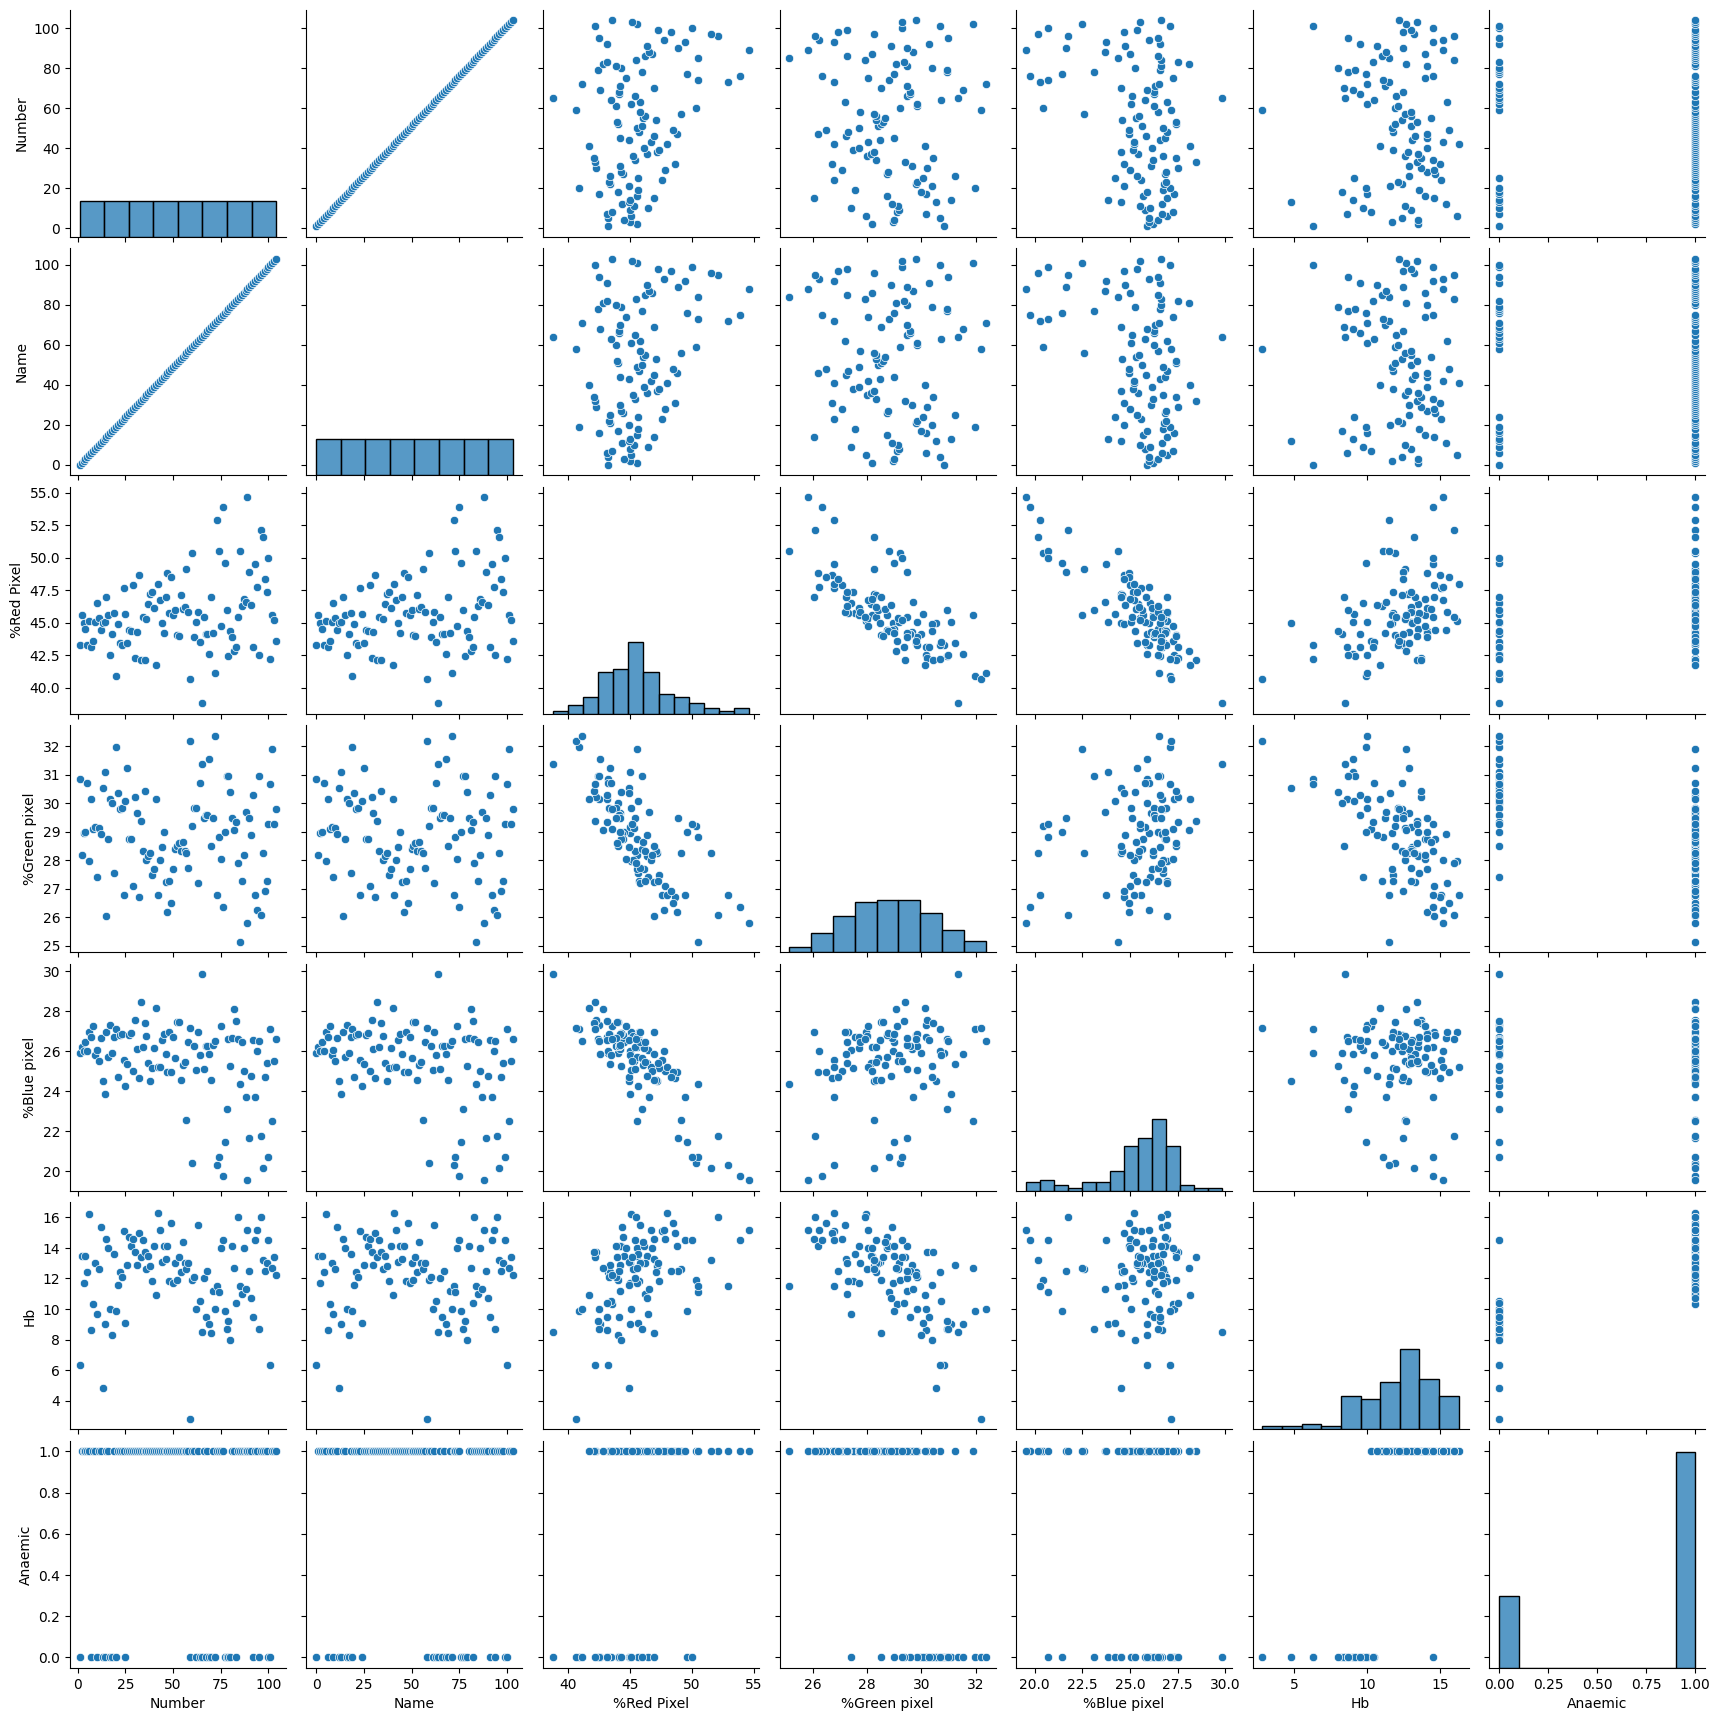

In [26]:
sns.pairplot(data)

In [31]:
data.head(1)

,Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,0,43.2555,30.8421,25.9025,6.3,0


<Axes: xlabel='Name', ylabel='%Green pixel'>

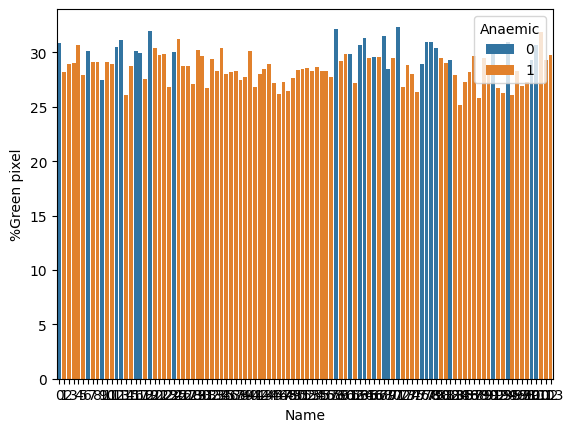

In [32]:
# This particular visualization is showing that more number of people are there who are anaemic over here
sns.barplot(x=data['Name'],y=data['%Green pixel'],hue=data['Anaemic'])